In [2]:
# Our three global feature descriptors are

#1. Color Histogram that quantifies color of the flower.
#2. Hu Moments that quantifies shape of the flower.
#3. Haralick Texture that quantifies texture of the flower.

# imports the necessary libraries we need to work with.
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
# from skimage import feature
from numpy import asarray
import seaborn as sn
import pandas as pd
import numpy as np
import mahotas
import h5py
import cv2
import os
print("[Status]: Done")

[Status]: Done


In [3]:

dataset_path       = "Dataset\FlowerSpecies"
csv_data         = "output\data.csv"
bins             = 8
print("[Status]: Done")

[Status]: Done


In [4]:
# Total we have 532 features
print("Dataset")
dataset = pd.read_csv(csv_data, index_col=False)
dataset

Dataset


,0,1,2,3,4,5,6,7,8,9,...,523,524,525,526,527,528,529,530,531,target
0,0.184988,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000196,0.000000,...,-0.356179,0.997427,0.001392,1.294344e-08,1.576264e-11,2.362576e-11,1.675599e-22,7.093943e-16,-4.240178e-22,ColisFoot
1,0.009137,0.027607,0.035892,0.025877,0.022856,0.005409,0.000171,0.000000,0.019469,0.055142,...,-0.417826,0.998729,0.001285,3.999153e-08,1.308353e-11,1.240816e-12,-4.659802e-24,1.908378e-16,-1.811318e-24,ColisFoot
2,0.025545,0.138692,0.097419,0.029746,0.006570,0.001734,0.000611,0.000586,0.064938,0.329428,...,-0.378930,0.998083,0.001404,6.409473e-09,5.603493e-11,4.478482e-11,-1.693046e-21,3.361158e-15,1.472031e-21,ColisFoot
3,0.307502,0.067096,0.036739,0.038602,0.027459,0.009694,0.002173,0.002518,0.070476,0.102248,...,-0.397676,0.998856,0.001157,2.324336e-08,1.817932e-11,6.867838e-12,-7.173048e-23,-9.329776e-16,-2.727063e-23,ColisFoot
4,0.034159,0.001364,0.001918,0.005391,0.001151,0.000000,0.000000,0.000000,0.031602,0.035011,...,-0.327613,0.996585,0.001032,6.045409e-10,4.703091e-12,2.804578e-12,1.018531e-23,-6.855849e-17,9.447483e-26,ColisFoot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.023570,0.001061,0.000645,0.000516,0.000301,0.000330,0.000530,0.000201,0.002007,0.001649,...,-0.316020,0.988116,0.002790,9.844702e-09,7.978470e-11,2.652328e-11,9.994940e-22,1.477162e-15,6.997797e-22,Tigerlily
636,0.000278,0.000080,0.000222,0.001112,0.001916,0.004721,0.010931,0.996832,0.000080,0.000309,...,-0.365934,0.983226,0.000849,8.034375e-11,1.777115e-13,3.491700e-13,6.225078e-26,-2.705756e-18,6.074652e-26,Tigerlily
637,0.000000,0.000000,0.000000,0.000000,0.000019,0.000019,0.000047,0.009369,0.000000,0.000000,...,-0.411821,0.998317,0.001715,3.520274e-08,1.711992e-10,1.026496e-10,4.470081e-21,-1.623771e-14,1.285261e-20,Tigerlily
638,0.000344,0.000021,0.000021,0.000021,0.000064,0.000086,0.000150,0.001096,0.000774,0.000430,...,-0.161884,0.955194,0.001394,1.191749e-08,2.597839e-12,5.991171e-12,-2.830118e-24,2.371580e-16,-2.346594e-23,Tigerlily


In [5]:
X = dataset.iloc[ : , :-1]
print("store features values into x ", X.shape)
Y = dataset.target
print("store features values into y ", Y.shape)

print("No of the features: ", np.array(X).shape[1])
print("Fearture vector size: ", np.array(X).shape)
print("Lables size[Target]: ", np.array(Y).shape)
# print("Lables [Target]: ", np.array(Y))

store features values into x  (640, 532)
store features values into y  (640,)
No of the features:  532
Fearture vector size:  (640, 532)
Lables size[Target]:  (640,)


In [9]:
scaler1 = MinMaxScaler(feature_range=(0, 1))
scaler2 =   StandardScaler() 
sd_scaler = scaler2.fit_transform(X)
mms_scaler = scaler1.fit_transform(X)
print("[STATUS] feature vector normalized...")
print(pd.DataFrame(mms_scaler).shape)
# x_plot = pd.DataFrame(x_rescaled)
# x_plot.plot.kde()
label_encoder = LabelEncoder()
target = label_encoder.fit_transform(Y)
# print(target)
# print(onehot)
# temp = encoder.inverse_transform(onehot)
# print(temp)
targetNames = np.unique(Y)
print("Target values are: ", target)
print("Target Shape: ", target.shape)
print("Target Names are: ", targetNames)
print("[STATUS] training labels encoded...")

[STATUS] feature vector normalized...
(640, 532)
Target values are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 

In [15]:
from sklearn.model_selection import train_test_split
train_frac = 0.7  #60%   left ->: 100-60 = 40%
valid_frac = 0.5 #(100/20)*10
test_frac = 0.5 #(100/20)*10

x_train, x_rem, y_train, y_rem = train_test_split(mms_scaler, target, train_size=train_frac)
# x_train, x_rem, y_train, y_rem = train_test_split(x_rescaled, target, train_size=train_frac)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)
print("Train vector size: ", x_train.shape, y_train.shape)
print("Test vector size: ", x_test.shape, y_test.shape)
print("Validation vector size: ", x_valid.shape, y_valid.shape)

Train vector size:  (448, 532) (448,)
Test vector size:  (96, 532) (96,)
Validation vector size:  (96, 532) (96,)


Training done!
Predicted value is = [0]
Actual value from test data is 1 and corresponding image is as below
Over all train accuracy % :  89.95535714285714
Over all test accuracy % :  64.58333333333334
Confusion Matrix For Test Data set : 

Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       0.91      0.59      0.71        17
           1       0.60      0.46      0.52        13
           2       0.77      0.83      0.80        12
           3       0.50      0.73      0.59        11
           4       0.67      0.67      0.67         6
           5       0.62      0.67      0.64        12
           6       0.47      0.67      0.55        12
           7       0.80      0.62      0.70        13

    accuracy                           0.65        96
   macro avg       0.67      0.65      0.65        96
weighted avg       0.68      0.65      0.65        96



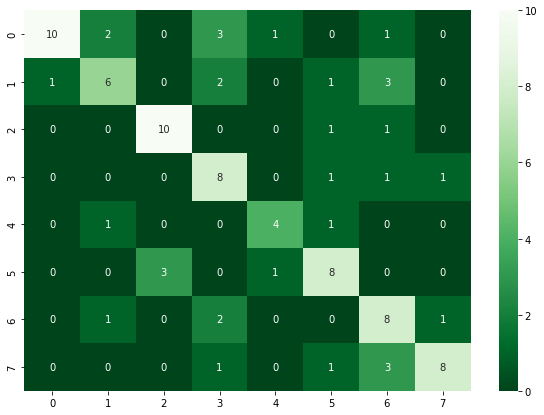

In [87]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train, y_train)
print("Training done!")
print('Predicted value is =', lm.predict([x_test[10]]))
print('Actual value from test data is %s and corresponding image is as below' % (y_test[10]) )

# print(lm.score(x_test, y_test))
y_pred_test = lm.predict(x_test)
y_pred_train = lm.predict(x_train)
print("Over all train accuracy % : ", accuracy_score(y_train, y_pred_train)*100)
print("Over all test accuracy % : ", accuracy_score(y_test, y_pred_test)*100)
# print("Over all test accuracy : ", accuracy_score(y_test, y_pred))
# print('Confusion Matrix For Test Data set : \n' + str(confusion_matrix(y_test, y_pred)))
print('Confusion Matrix For Test Data set : \n')
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
# cmap= "Greens_r"
# cmap= "OrRd_r"
# cmap= "OrRd"
sn.heatmap(cm, annot=True,cmap="Greens_r")
print("Classification Report for 3-classes: ")
cr = classification_report(y_test, y_pred_test)
print(cr)

Training done!
Predicted value is = [3]
Actual value from test data is 1 and corresponding image is as below
Over all train accuracy % :  96.20535714285714
Over all test accuracy % :  55.208333333333336
Confusion Matrix For Test Data set : 

Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       0.78      0.41      0.54        17
           1       0.40      0.31      0.35        13
           2       1.00      0.58      0.74        12
           3       0.35      0.73      0.47        11
           4       0.67      0.67      0.67         6
           5       0.69      0.75      0.72        12
           6       0.39      0.75      0.51        12
           7       1.00      0.38      0.56        13

    accuracy                           0.55        96
   macro avg       0.66      0.57      0.57        96
weighted avg       0.67      0.55      0.56        96



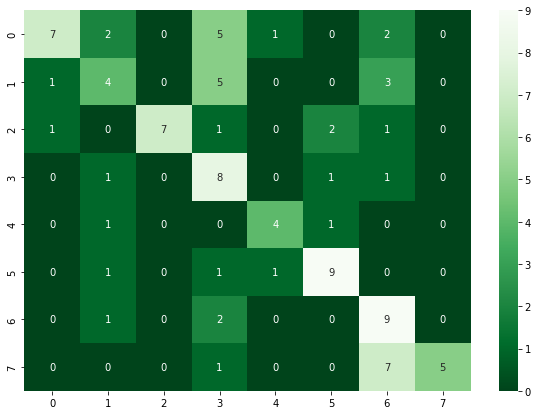

In [106]:
sgd = linear_model.SGDClassifier()
sgd.fit(x_train, y_train)
print("Training done!")
print('Predicted value is =', sgd.predict([x_test[12]]))
print('Actual value from test data is %s and corresponding image is as below' % (y_test[12]) )

# print(lm.score(x_test, y_test))
y_pred_test = sgd.predict(x_test)
y_pred_train = sgd.predict(x_train)
df = pd.DataFrame(x_test)
df['Actual'] = y_test
df['Predicted']  = y_pred_test
df.to_csv('Result_exp/Logistic_Regression_Result/test_result.csv')
print("Over all train accuracy % : ", accuracy_score(y_train, y_pred_train)*100)
print("Over all test accuracy % : ", accuracy_score(y_test, y_pred_test)*100)
# print("Over all test accuracy : ", accuracy_score(y_test, y_pred))
# print('Confusion Matrix For Test Data set : \n' + str(confusion_matrix(y_test, y_pred)))
print('Confusion Matrix For Test Data set : \n')
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
# cmap= "Greens_r"
# cmap= "OrRd_r"
# cmap= "OrRd"
sn.heatmap(cm, annot=True,cmap="Greens_r")
print("Classification Report for 3-classes: ")
print(classification_report(y_test, y_pred_test))

In [108]:
from sklearn.model_selection import train_test_split
train_frac = 0.6  #60%   left ->: 100-60 = 40%
valid_frac = 0.5 #(100/40)*20
test_frac = 0.5 #(100/40)*20

x_train, x_rem, y_train, y_rem = train_test_split(sd_scaler, target, train_size=train_frac)
# x_train, x_rem, y_train, y_rem = train_test_split(x_rescaled, target, train_size=train_frac)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=test_frac)
print("Train vector size: ", x_train.shape, y_train.shape)
print("Test vector size: ", x_test.shape, y_test.shape)
print("Validation vector size: ", x_valid.shape, y_valid.shape)


Train vector size:  (384, 532) (384,)
Test vector size:  (128, 532) (128,)
Validation vector size:  (128, 532) (128,)


Training done!
Predicted value is = [4]
Actual value from test data is 4 and corresponding image is as below
Over all train accuracy % :  99.21875
Over all test accuracy % :  70.3125
Confusion Matrix For Test Data set : 

Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       0.60      0.71      0.65        17
           1       0.42      0.45      0.43        11
           2       0.95      0.90      0.93        21
           3       0.65      0.79      0.71        14
           4       0.86      0.86      0.86        14
           5       0.57      0.53      0.55        15
           6       0.56      0.59      0.57        17
           7       1.00      0.68      0.81        19

    accuracy                           0.70       128
   macro avg       0.70      0.69      0.69       128
weighted avg       0.73      0.70      0.71       128



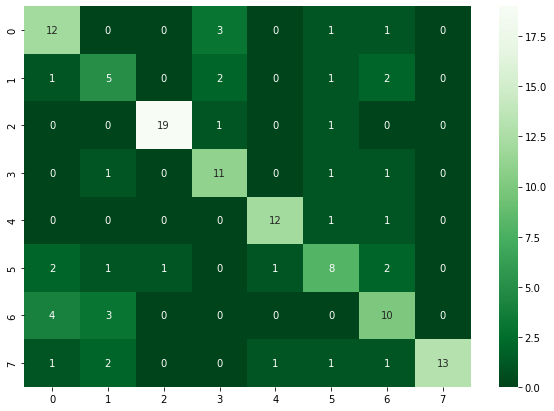

In [110]:
lm = linear_model.LogisticRegression(multi_class='ovr', solver='liblinear')
lm.fit(x_train, y_train)
print("Training done!")
print('Predicted value is =', lm.predict([x_test[12]]))
print('Actual value from test data is %s and corresponding image is as below' % (y_test[12]) )

# print(lm.score(x_test, y_test))
y_pred_test = lm.predict(x_test)
y_pred_train = lm.predict(x_train)
df = pd.DataFrame(x_test)
df['Actual'] = y_test
df['Predicted']  = y_pred_test
df.to_csv('Result_exp/Logistic_Regression_Result/test_result.csv')
print("Over all train accuracy % : ", accuracy_score(y_train, y_pred_train)*100)
print("Over all test accuracy % : ", accuracy_score(y_test, y_pred_test)*100)
# print("Over all test accuracy : ", accuracy_score(y_test, y_pred))
# print('Confusion Matrix For Test Data set : \n' + str(confusion_matrix(y_test, y_pred)))
print('Confusion Matrix For Test Data set : \n')
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
# cmap= "Greens_r"
# cmap= "OrRd_r"
# cmap= "OrRd"
sn.heatmap(cm, annot=True,cmap="Greens_r")
print("Classification Report for 3-classes: ")
print(classification_report(y_test, y_pred_test))

Training done!
Predicted value is = [4]
Actual value from test data is 4 and corresponding image is as below
Over all train accuracy % :  97.91666666666666
Over all test accuracy % :  72.65625
Confusion Matrix For Test Data set : 

Classification Report for 3-classes: 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.60      0.55      0.57        11
           2       0.86      0.90      0.88        21
           3       0.75      0.86      0.80        14
           4       0.68      0.93      0.79        14
           5       0.70      0.47      0.56        15
           6       0.61      0.65      0.63        17
           7       0.83      0.53      0.65        19

    accuracy                           0.73       128
   macro avg       0.72      0.72      0.71       128
weighted avg       0.73      0.73      0.72       128



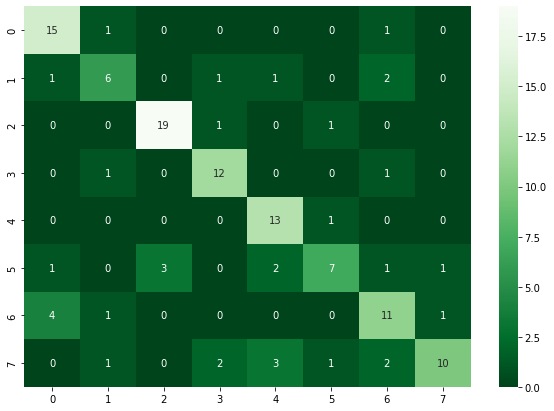

In [111]:
sgd = linear_model.SGDClassifier()
sgd.fit(x_train, y_train)
print("Training done!")
print('Predicted value is =', sgd.predict([x_test[12]]))
print('Actual value from test data is %s and corresponding image is as below' % (y_test[12]) )

# print(lm.score(x_test, y_test))
y_pred_test = sgd.predict(x_test)
y_pred_train = sgd.predict(x_train)
df = pd.DataFrame(x_test)
df['Actual'] = y_test
df['Predicted']  = y_pred_test
df.to_csv('Result_exp/Logistic_Regression_Result/test_result.csv')
print("Over all train accuracy % : ", accuracy_score(y_train, y_pred_train)*100)
print("Over all test accuracy % : ", accuracy_score(y_test, y_pred_test)*100)
# print("Over all test accuracy : ", accuracy_score(y_test, y_pred))
# print('Confusion Matrix For Test Data set : \n' + str(confusion_matrix(y_test, y_pred)))
print('Confusion Matrix For Test Data set : \n')
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (10,7))
# cmap= "Greens_r"
# cmap= "OrRd_r"
# cmap= "OrRd"
sn.heatmap(cm, annot=True,cmap="Greens_r")
print("Classification Report for 3-classes: ")
print(classification_report(y_test, y_pred_test))